In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv('churn_logistic.csv')
churn.shape

(5700, 21)

In [3]:
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [5]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

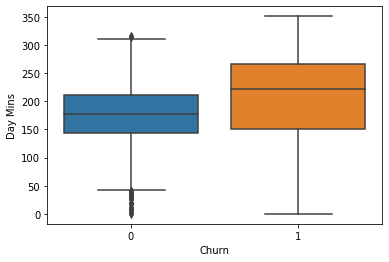

In [8]:
sns.boxplot(x = 'Churn', y = 'Day Mins', data = churn)
plt.show()

In [12]:
columns = list(churn.columns)

In [15]:
columns.remove('Churn')

In [16]:
columns.remove('Day Mins')

In [17]:
columns

['Account Length',
 'VMail Message',
 'Eve Mins',
 'Night Mins',
 'Intl Mins',
 'CustServ Calls',
 'Intl Plan',
 'VMail Plan',
 'Day Calls',
 'Day Charge',
 'Eve Calls',
 'Eve Charge',
 'Night Calls',
 'Night Charge',
 'Intl Calls',
 'Intl Charge',
 'State',
 'Area Code',
 'Phone']

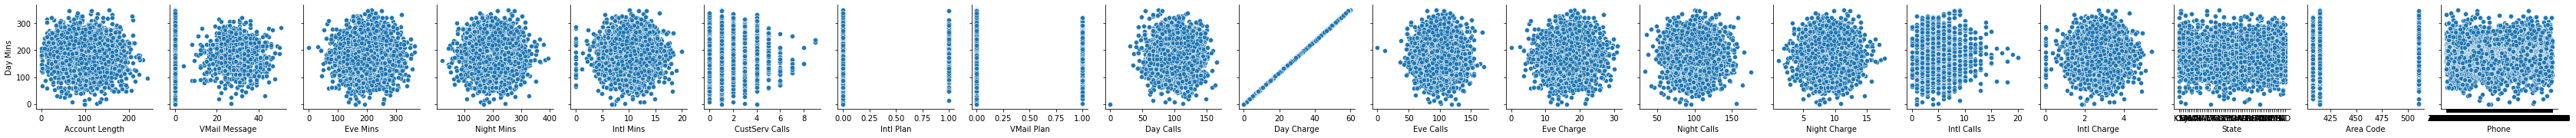

In [18]:
sns.pairplot(data= churn, y_vars= ['Day Mins'], x_vars = columns)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='Account Length'>

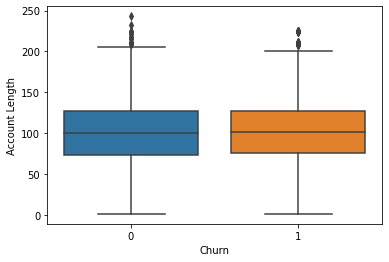

In [20]:
sns.boxplot(x = 'Churn', y = 'Account Length', data = churn)

In [22]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message', ]
X = churn[cols]
y = churn['Churn']

In [23]:
X.shape

(5700, 5)

In [24]:
y.shape

(5700,)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.25, random_state=4)

In [31]:
X_train.shape, X_val.shape, X_test.shape

((3420, 5), (1140, 5), (1140, 5))

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# learn mu and sig here from train data
scaler.fit(X_train)

# apply learnt mu and sig to all three cases. 
X_train  = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [36]:
X_train[:5]

array([[-1.3401872 , -2.29116555, -0.52179332,  2.19011647, -0.5352414 ],
       [-0.37273287, -1.19169576, -1.15081453, -0.45659672, -0.5352414 ],
       [ 1.54289097,  0.33984637, -0.52179332, -0.45659672, -0.5352414 ],
       [-0.6684332 ,  0.58288706,  1.3652703 , -0.45659672,  1.2237028 ],
       [-0.01274987, -1.73757286, -1.15081453, -0.45659672, -0.5352414 ]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression() # default C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
# accuracy
model.score(X_train, y_train)

0.7564327485380117

In [40]:
model.score(X_val, y_val)

0.7578947368421053

In [41]:
model.coef_

array([[ 0.78670623,  0.31093629,  0.94086792,  0.8692631 , -0.31783734]])

In [42]:
model.intercept_

array([0.05338236])

In [61]:
train_scores = []
val_scores = []
lambda_values = []

for lam in np.arange(0.01, 10000, 100):
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)
    
    tr_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    
    train_scores.append(tr_score)
    val_scores.append(val_score)
    lambda_values.append(lam)

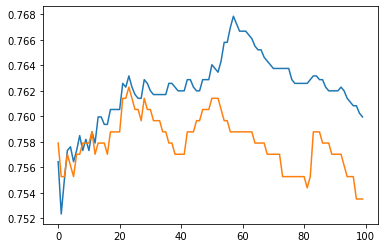

In [53]:
plt.plot(train_scores)
plt.plot(val_scores)

In [56]:
np.argmax(val_scores)

23

In [73]:
lambda_values[23]

2300.01

In [72]:
# 0.01 + 100 + 100 + 100 + 100+ 100 

In [69]:
best_lamda = (0.01 + 100)*23

In [70]:
model = LogisticRegression(C = 1/best_lamda)
model.fit(X_train, y_train)

LogisticRegression(C=0.00043473913478217393)

In [71]:
# accuracy
model.score(X_test, y_test)

0.7684210526315789

If two predictors are highly correlated then
It makes estimates of regression coefficients unstable which results in a high standard error and fails to reject the null hypothesis.

lambda = [1,0.1,0.01],

train - [0.90, 0.98, 0.93], 
test- [0.78,   0.99, 0.97]